# Exploratory Data Analysis (EDA) Bank dataset

### Información relevante del Dataset

#### Bank client data:
Input variables:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single")
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
#### Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb" ...)
  12 - duration: last contact duration, in seconds (numeric)
#### Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
#### Output variable (desired target):
  17 - deposit - has the client subscribed a term deposit? (binary: "yes","no")

### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

/var/folders/4f/ts7gk_kd60q4j4k_6hmrs9_r0000gp/T/ipykernel_43389/2791432067.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Cargar el dataset 

In [2]:
datos = pd.read_csv('bank_dataset.csv')

### Informació general del dataset

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Mostrar las primeras filas de DS

In [4]:
datos.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Descripció estadística del dataset

In [5]:
datos.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Calcular medidas de tendencia central y dispersión

In [6]:
# Seleccionar columnas numéricas
col_numericas = datos.select_dtypes(include=['float64', 'int64']).columns

# Calcular estadísticas
for col in col_numericas:
    print(f"Análisis de la columna: {col}")
    print(f"Media: {datos[col].mean()}")
    print(f"Mediana: {datos[col].median()}")
    print(f"Desviación estándar: {datos[col].std()}")
    print(f"Rango: {datos[col].max() - datos[col].min()}")
    print("-" * 40)


Análisis de la columna: age
Media: 41.235383787661405
Mediana: 39.0
Desviación estándar: 11.914934487732378
Rango: 77.0
----------------------------------------
Análisis de la columna: balance
Media: 1528.5385235620856
Mediana: 550.0
Desviación estándar: 3225.413325946151
Rango: 88051
----------------------------------------
Análisis de la columna: day
Media: 15.658036194230425
Mediana: 15.0
Desviación estándar: 8.420739541006451
Rango: 30
----------------------------------------
Análisis de la columna: duration
Media: 371.99381831213043
Mediana: 255.0
Desviación estándar: 347.12838571630584
Rango: 3879
----------------------------------------
Análisis de la columna: campaign
Media: 2.508421429851281
Mediana: 2.0
Desviación estándar: 2.722077181661486
Rango: 62
----------------------------------------
Análisis de la columna: pdays
Media: 51.33040673714388
Mediana: -1.0
Desviación estándar: 108.75828197197696
Rango: 855
----------------------------------------
Análisis de la columna: pr

**age**
Media (41.24) y mediana (39.0): posibles valores extremos mayores.
Desviación estándar (11.91): dispersión razonable en la variable.
Rango (77): Indica una gran amplitud en las edades

**balance**
Media (1528.54) y mediana (550.0): La media considerablemente mayor que la mediana, debido a balances muy altos en algunos clientes.
Desviación estándar (3225.41): Muy alta en comparación con la media, lo que confirma la existencia de una alta variabilidad en los balances.
Rango (88051): Extremadamente amplio, lo que respalda la existencia de balances extremos.

**duration**
Media (371.99) y mediana (255.0): La media es significativamente mayor que la mediana, indicando una distribución asimétrica hacia la derecha. Esto implica que algunas interacciones telefónicas fueron considerablemente más largas.
Desviación estándar (347.13): Alta en comparación con la media, gran variabilidad en la duración.
Rango (3879): Extremadamente amplio; algunas llamadas podrían ser mucho más largas que el promedio.

**campaign**
Media (2.51) y mediana (2.0): Valores cercanos, indicando una distribución simétrica.
Desviación estándar (2.72): Alta en relación con la media, indica que algunos clientes han sido contactados muchas veces.
Rango (62): Amplio, sugiriendo que algunos clientes fueron contactados en exceso.

pdays
Media (51.33) y mediana (-1.0): La media está influenciada por valores altos, mientras que la mediana es negativa (-1 indica que el cliente no fue contactado en campañas anteriores), distribución altamente asimétrica.
Desviación estándar (108.76): Muy alta, respalda la variabilidad.
Rango (855): Amplio, con valores extremadamente altos.

**previous**
Media (0.83) y mediana (0.0): La mediana indica que la mayoría de los clientes no tuvieron contactos previos. La media, está influenciada por valores extremos.
Desviación estándar (2.29): Relativamente alta en comparación con la media, lo que sugiere que algunos clientes han sido contactados muchas veces.
Rango (58): Amplio, indica posibles valores extremos.

Viendo la información que presenta el analisis de las medidas de tendencia central y sus respectivos graficos se encuentra que todos presentan outliers significativos exeptuando la variable "day".

### Histograma de cada variable numerica y gráficos de cajas(boxplots).

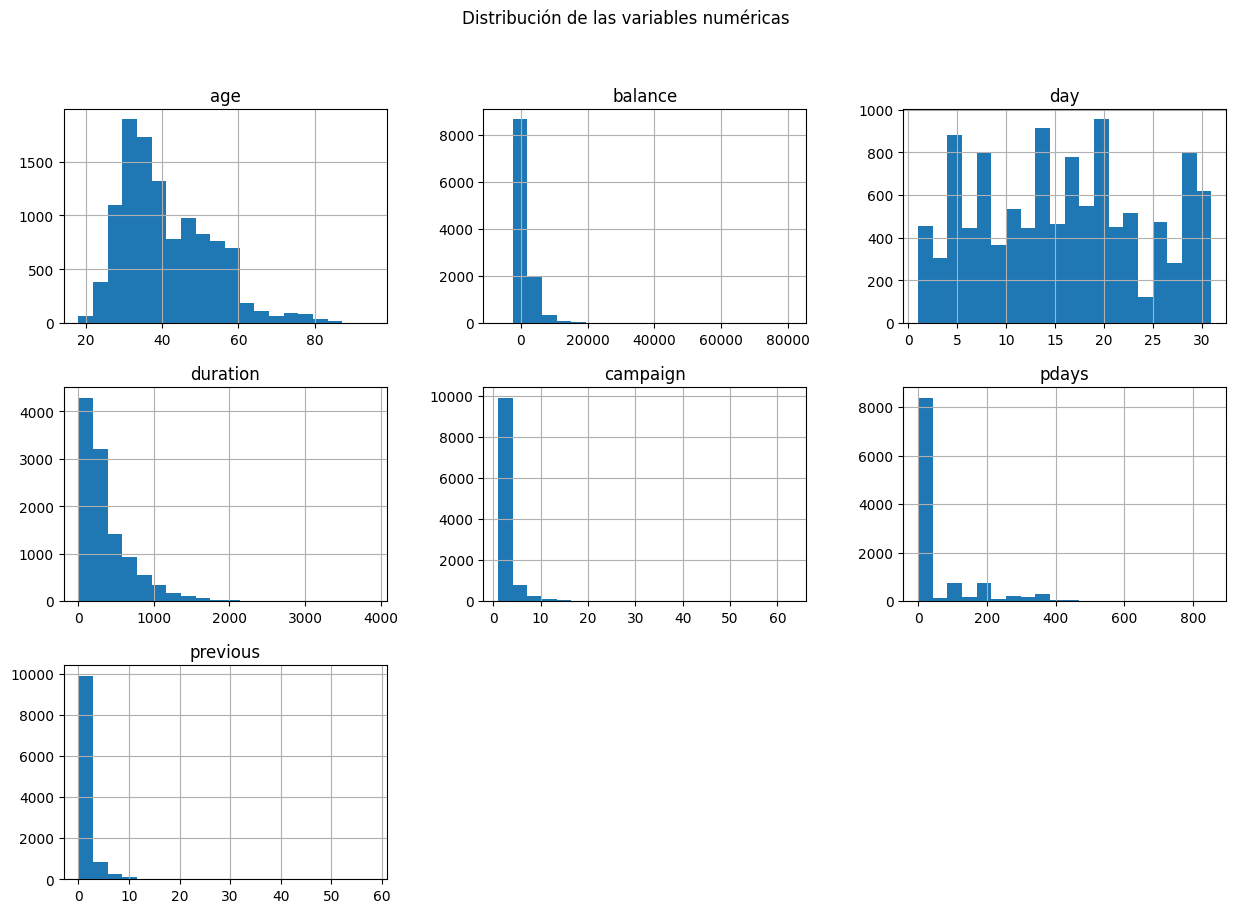

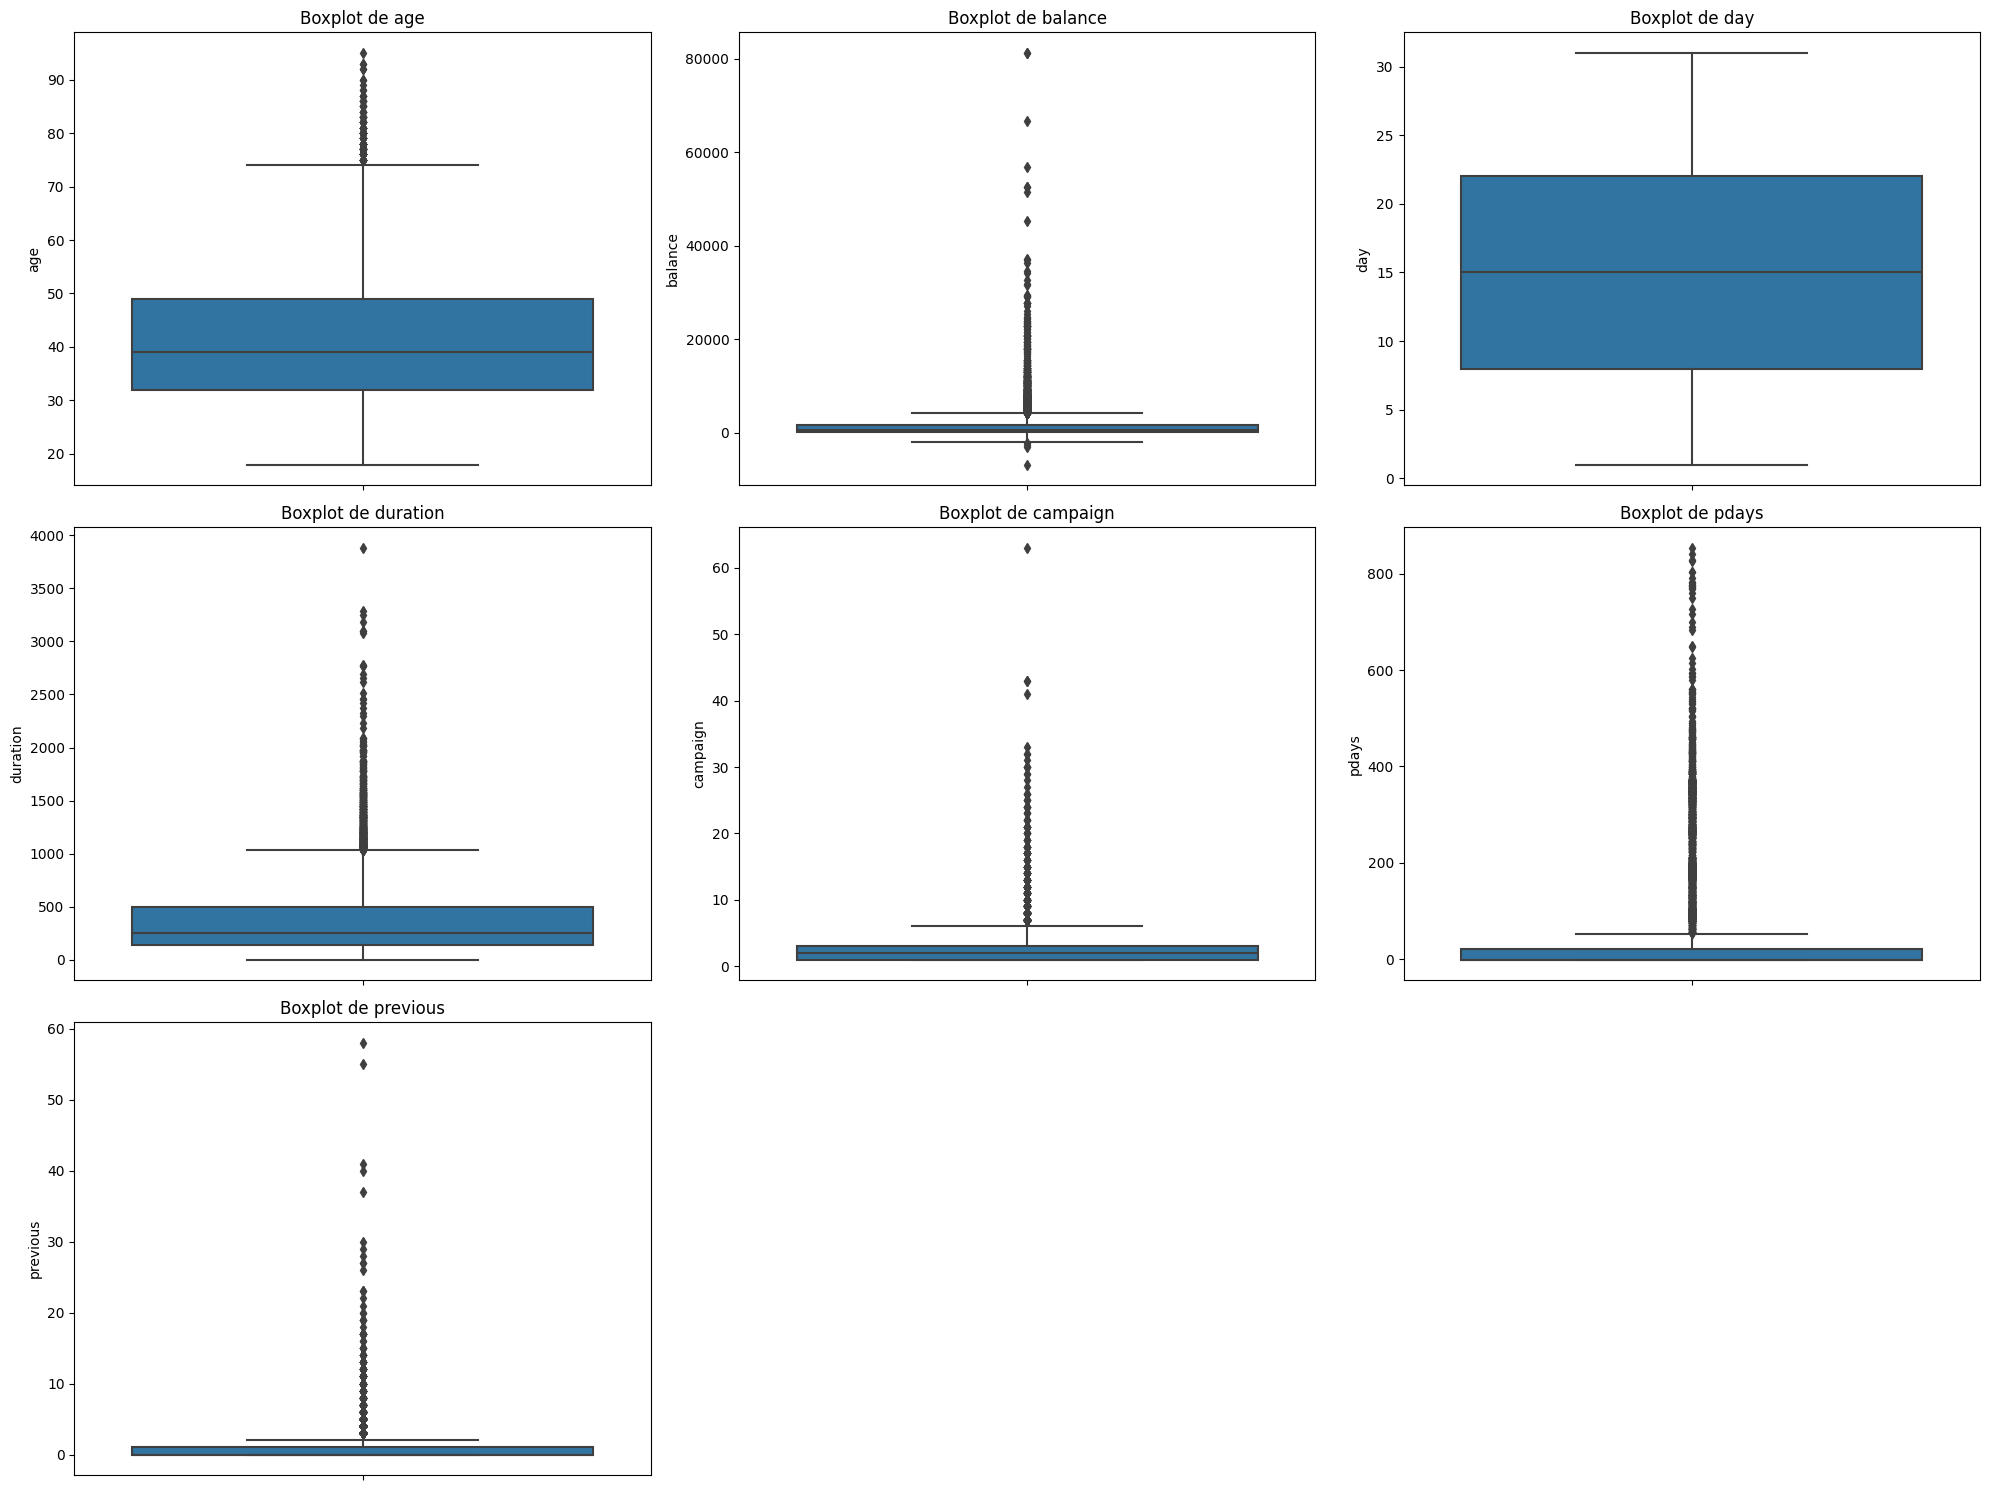

In [7]:
# Histogramas para todas las columnas numéricas
datos[col_numericas].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

# Gráficos de cajas para detectar outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(col_numericas, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=datos[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

### Winzorizar columnas con outliers

In [8]:
def winzorize_columns(datos, columns=None, lower_percentile=0.05, upper_percentile=0.95):
    if columns is None:
        # Si no se especifican columnas, tomar todas las columnas numéricas
        columns = datos.select_dtypes(include=['number']).columns.tolist()
        
    for column in columns:
        # Calcular percentiles
        lower_limit = datos[column].quantile(lower_percentile)
        upper_limit = datos[column].quantile(upper_percentile)
        
        # Winzorizar la columna: reemplazar valores fuera de los límites por el valor más cercano
        datos[column] = datos[column].clip(lower=lower_limit, upper=upper_limit)
    
    return datos

datos_winzorized = winzorize_columns(datos, columns=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'])


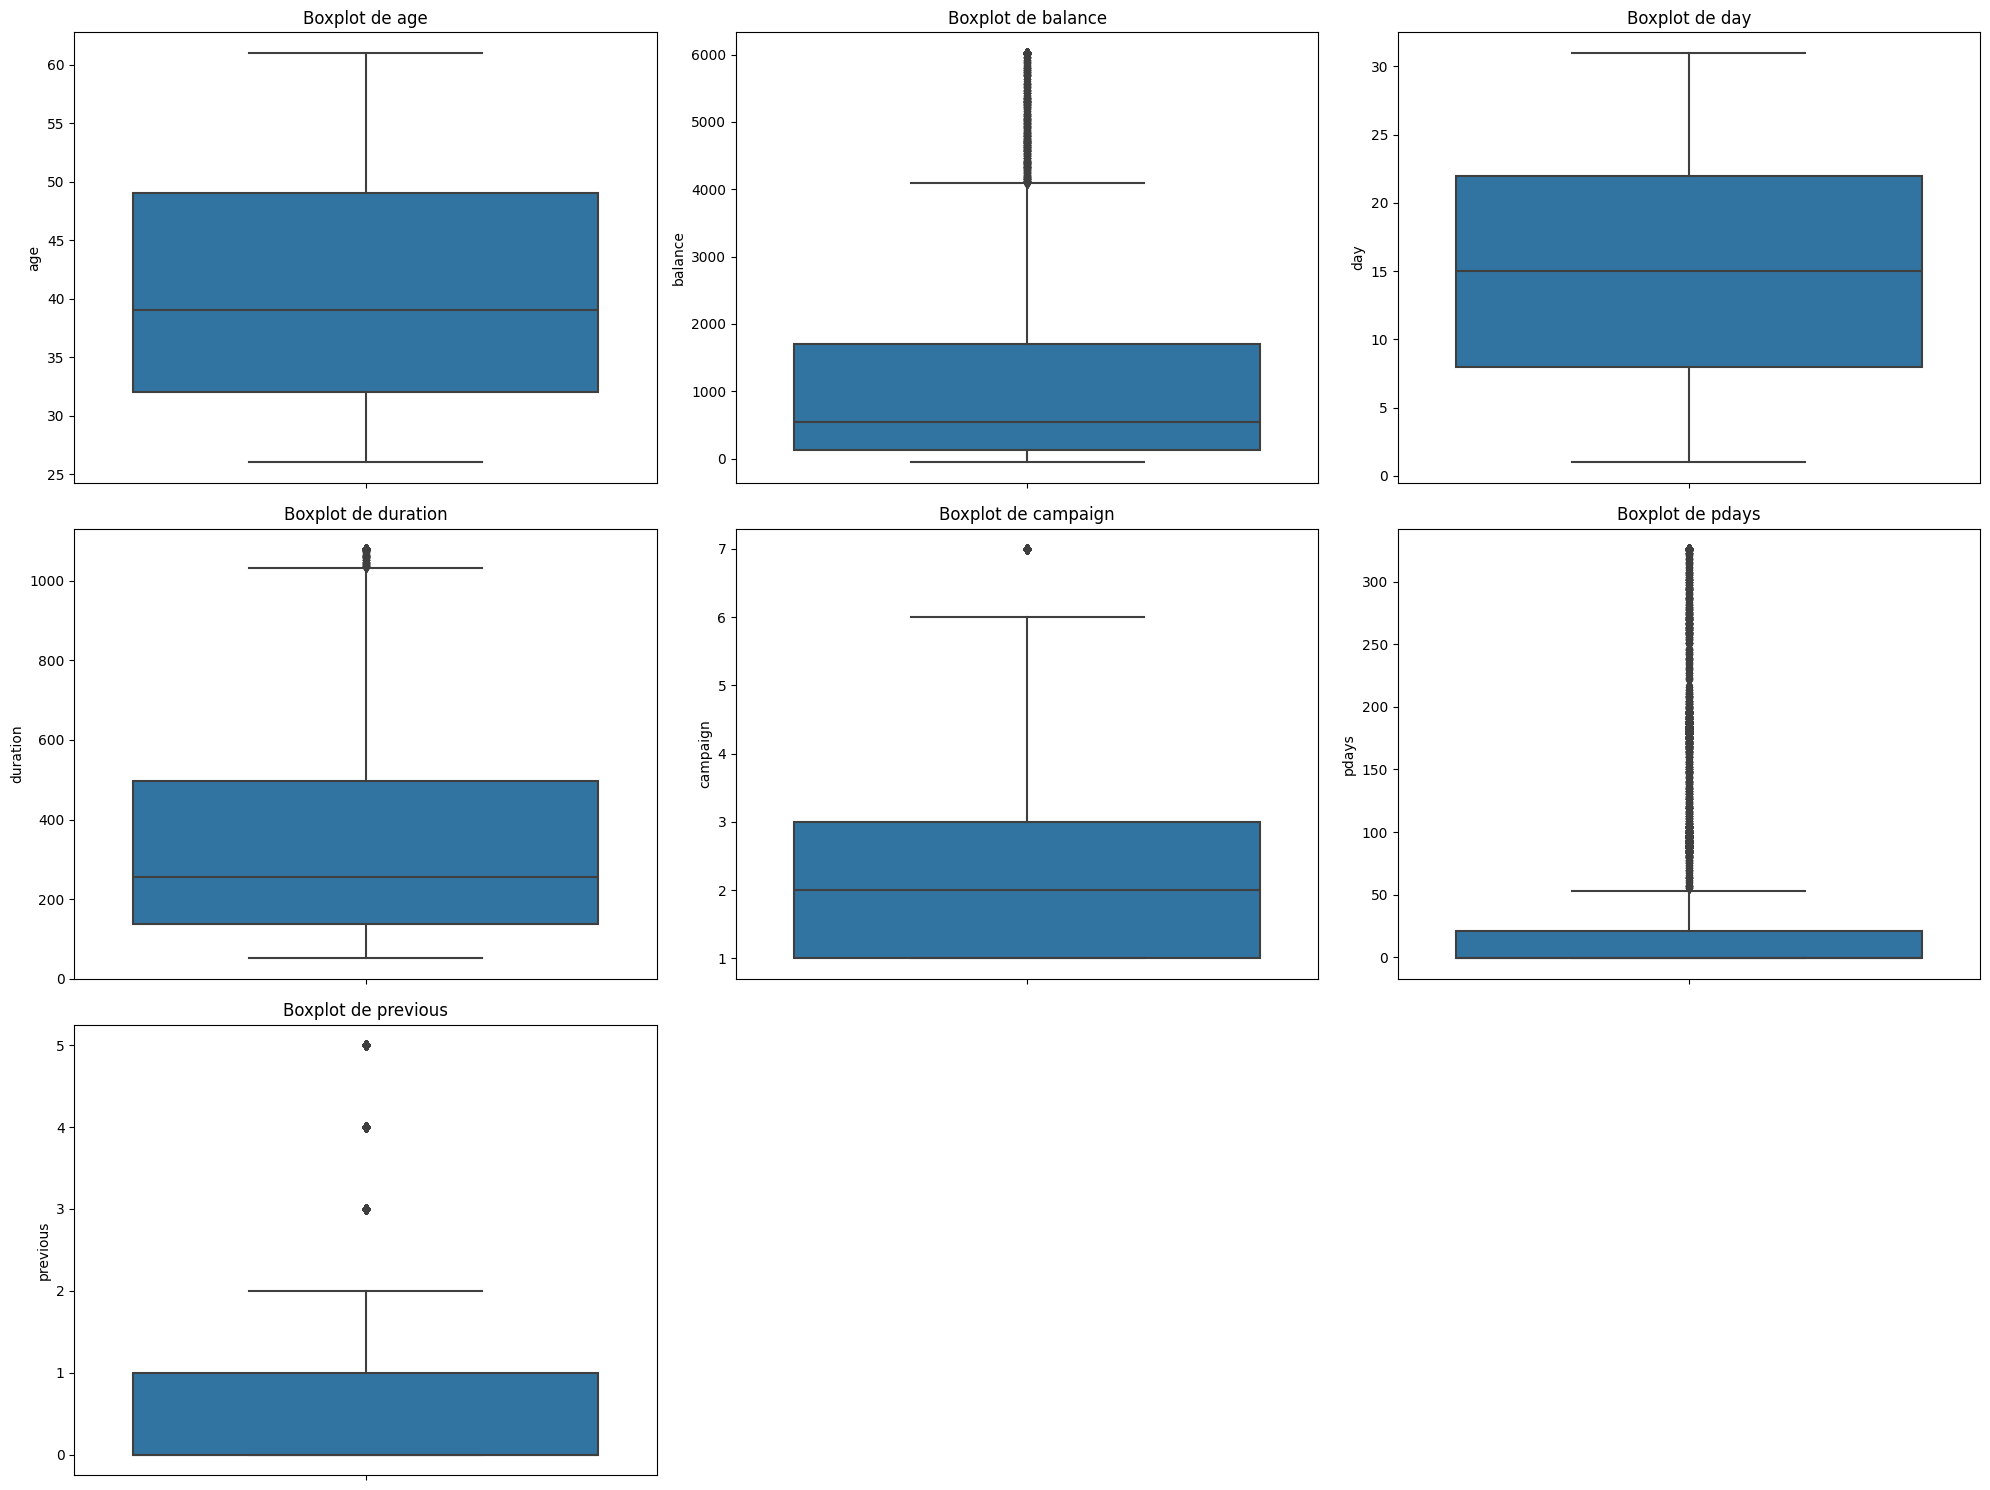

In [9]:
col_num = datos_winzorized.select_dtypes(include=['float64', 'int64']).columns

# Gráficos de cajas para detectar outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(col_num, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=datos_winzorized[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

### Desbalance de clases
existe un ligero desbalance en la variable objetivo, donde hay una mayoria en los usuarios que contestaron un "NO" del 52% sobres los "SI" que son un 47%. Se podria balancear esto con un sub o sobremuestreo, ya que el algoritmo que se plantea usar con los datos es un clustering no se ve necesario hacer cambios en la variable objetivo (deposit) 

In [10]:
print(datos_winzorized['deposit'].value_counts())
print(datos_winzorized['deposit'].value_counts(normalize=True))  

deposit
no     5873
yes    5289
Name: count, dtype: int64
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


### Contar los valores de cada variable categórica
revisando los valores que contienen las variables categoricas para poder entender y tener una idea de los datos categoricos que se tienen y sus tipos.

In [11]:
for column in datos.select_dtypes(include=['object']).columns:
    print(datos[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

### Contar los valores nulos por columna
Encontrando los valores nulos o faltantes en cada una de las columnas del dataset

In [12]:
datos_winzorized.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Manejo de datos Faltantes
He encontrado que el dataset cuenta con algunos datos faltantes en las columnas de edad, educación y estado civil, para ello utilizare la estrategia de imputación. Para los datos numéricos (edad) revisare la media, mediana o moda; mientras que para los datos categóricos (educacion y estado civil) imputare con la moda.  

In [13]:
# Verificar valores nulos en la columna 'edad'
print("Valores nulos en 'edad' antes de la imputación:", datos_winzorized['age'].isnull().sum())

Valores nulos en 'edad' antes de la imputación: 10


En este caso imputare con la mediana ya que quiero que el campo de edad tenga un valor entero que coincide con un valor comun de edad, al contario del valor que me da la media 

In [14]:
# Imputar con la mediana
datos_winzorized['age'] = datos_winzorized['age'].fillna(datos_winzorized['age'].median())

# Verificar valores nulos después de la imputación
print("Valores nulos en 'edad' después de la imputación:", datos_winzorized['age'].isnull().sum())

Valores nulos en 'edad' después de la imputación: 0


* Para la imputación de la variable categorica (education) utilizare el valor especifico "unknown" aprovechando que existen otros valores en la columna con el mismo nombre asi sera mucho mas cercana la respuesta a los valores que hacen falta.
* Para la imputación de la variable categorica (marital) utilizare la moda 

In [15]:
# Verificar valores nulos antes de la imputación
print("Valores nulos antes de la imputación:")
print("Estado civil:", datos_winzorized['marital'].isnull().sum())
print("Educación:", datos_winzorized['education'].isnull().sum())

# Imputar valores nulos con la moda
datos_winzorized['marital'] = datos_winzorized['marital'].fillna(datos['marital'].mode()[0])

# Imputar valores nulos remplazando por un valor especifico 
datos_winzorized['education'] = datos_winzorized['education'].fillna("unknown")

dts_con_impu = datos_winzorized

# Verificar valores nulos después de la imputación
print("\nValores nulos después de la imputación:")
print("Estado civil:", dts_con_impu['marital'].isnull().sum())
print("Educación:", dts_con_impu['education'].isnull().sum())

Valores nulos antes de la imputación:
Estado civil: 5
Educación: 7

Valores nulos después de la imputación:
Estado civil: 0
Educación: 0


### Calcular la matriz de correlación y visualizar con un mapa de calor

In [16]:
correlation = dts_con_impu.corr(numeric_only=True)

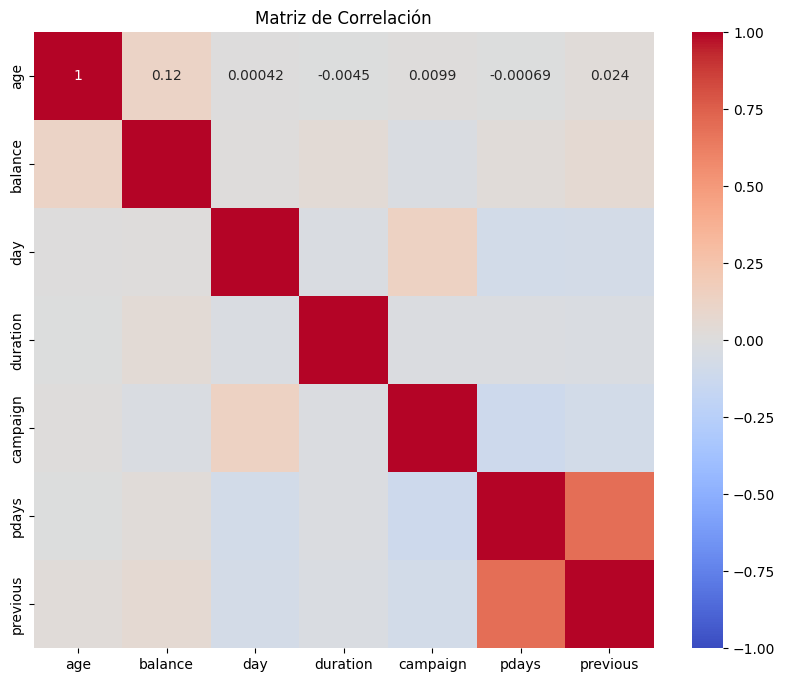

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()

### Análisis de características categóricas vs. Variable binaria (deposit)
Para características categóricas, se utiliza la prueba de Chi-cuadrado para evaluar la independencia entre la característica y la variable objetivo

In [18]:
from scipy.stats import chi2_contingency

In [19]:
# Lista de características categóricas
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Inicializar una lista para almacenar los resultados
chi2_results = []

# Prueba de Chi-cuadrado
for feature in categorical_features:
    contingency_table = pd.crosstab(dts_con_impu[feature], dts_con_impu['deposit'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Almacenar los resultados en la lista
    chi2_results.append({'feature': feature, 'chi2_stat': chi2, 'p_value': p_value})
    
    print(f"Prueba Chi-cuadrado para {feature}:")
    print(f" - Chi2: {chi2:.4f}, p-valor: {p_value:.4e}")
    if p_value < 0.05:
        print(f"   -> Relación estadísticamente significativa con deposit (p < 0.05)\n")
    else:
        print(f"   -> No hay evidencia de relación significativa con deposit (p >= 0.05)\n")


Prueba Chi-cuadrado para job:
 - Chi2: 378.0753, p-valor: 2.7417e-74
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba Chi-cuadrado para marital:
 - Chi2: 108.7273, p-valor: 2.4556e-24
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba Chi-cuadrado para education:
 - Chi2: 122.8182, p-valor: 1.9074e-26
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba Chi-cuadrado para default:
 - Chi2: 17.8086, p-valor: 2.4428e-05
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba Chi-cuadrado para housing:
 - Chi2: 463.1892, p-valor: 9.7244e-103
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba Chi-cuadrado para loan:
 - Chi2: 135.8322, p-valor: 2.1713e-31
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba Chi-cuadrado para contact:
 - Chi2: 736.6867, p-valor: 1.0728e-160
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Pru

* Segun lo que arroja la prueba de Chi2 todas las caracteristicas categorias tiene una relación estadisticamente significantiva con respecto a la variable objetivo 

In [20]:
# Convertir los resultados en un DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Ordenar por p_value y chi2_stat
chi2_df_sorted = chi2_df.sort_values(by=['p_value', 'chi2_stat'], ascending=[False, True])

# Mostrar el resultado ordenado
print("Resultados ordenados por p-value y chi2:")
print(chi2_df_sorted)

Resultados ordenados por p-value y chi2:
     feature    chi2_stat        p_value
3    default    17.808574   2.442800e-05
1    marital   108.727339   2.455604e-24
2  education   122.818196   1.907361e-26
5       loan   135.832171   2.171287e-31
0        job   378.075256   2.741690e-74
4    housing   463.189241  9.724394e-103
6    contact   736.686680  1.072803e-160
8   poutcome  1004.635780  1.776185e-217
7      month  1046.774503  1.642083e-217


#### Tabla de contingencia
Busque hacer una tabla de contingenia para evaluar las frecuencias observadas entre la categoria "default" y "deposit".
* Hay una diferencia notable en el comportamiento de los clientes según si tienen historial de incumplimientos (default).
Los clientes con default = yes tienen menos probabilidades de realizar depósitos en comparación con los que tienen default = no.

In [21]:
# Tabla de contingencia entre default y deposit
contingency_table = pd.crosstab(dts_con_impu['default'], dts_con_impu['deposit'])
print("Tabla de contingencia:")
print(contingency_table)

# Mostrar las proporciones de cada categoría respecto al total de la fila
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("\nProporciones por fila:")
print(proportions)


Tabla de contingencia:
deposit    no   yes
default            
no       5757  5237
yes       116    52

Proporciones por fila:
deposit        no       yes
default                    
no       0.523649  0.476351
yes      0.690476  0.309524


### Análisis de características numéricas vs. Variable binaria (deposit)
Para características numéricas se uso pruebas t para comparar los valores medios entre las clases de la variable deposit.

In [22]:
from scipy.stats import ttest_ind

In [23]:
# Lista de características numéricas
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Separar los datos según la clase de la variable objetivo
group_yes = dts_con_impu[dts_con_impu['deposit'] == 'yes']
group_no = dts_con_impu[dts_con_impu['deposit'] == 'no']

# Inicializar una lista para almacenar los resultados
t_test_results = []

# Prueba t para cada característica numérica
for feature in numerical_features:
    t_stat, p_value = ttest_ind(group_yes[feature], group_no[feature], nan_policy='omit')

    # Guardar los resultados en la lista
    t_test_results.append({'feature': feature, 't_stat': t_stat, 'p_value': p_value})
    
    print(f"Prueba t para {feature}:")
    print(f" - Estadístico t: {t_stat:.4f}, p-valor: {p_value:.4e}")
    if p_value < 0.05:
        print(f"   -> Relación estadísticamente significativa con deposit (p < 0.05)\n")
    else:
        print(f"   -> No hay evidencia de relación significativa con deposit (p >= 0.05)\n")


Prueba t para age:
 - Estadístico t: 1.4790, p-valor: 1.3918e-01
   -> No hay evidencia de relación significativa con deposit (p >= 0.05)

Prueba t para balance:
 - Estadístico t: 13.1238, p-valor: 4.6778e-39
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba t para day:
 - Estadístico t: -5.9598, p-valor: 2.6022e-09
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba t para duration:
 - Estadístico t: 59.0283, p-valor: 0.0000e+00
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba t para campaign:
 - Estadístico t: -14.5506, p-valor: 1.5761e-47
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba t para pdays:
 - Estadístico t: 16.4860, p-valor: 2.3838e-60
   -> Relación estadísticamente significativa con deposit (p < 0.05)

Prueba t para previous:
 - Estadístico t: 21.6830, p-valor: 3.7438e-102
   -> Relación estadísticamente significativa con deposit (p < 0.05)



* Segun lo que arroja la prueba t de todas las caracteristicas numericas tiene una relación estadisticamente significantiva con respecto a la variable objetivo con exepcion de la variable Age que no tiene evidencia de relación significativa. 

In [24]:
# Convertir los resultados en un DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Ordenar por p_value y t_stat
t_test_df_sorted = t_test_df.sort_values(by=['p_value', 't_stat'], ascending=[True, False])

# Mostrar el resultado ordenado
print("Resultados ordenados por p-value y estadístico t:")
print(t_test_df_sorted)


Resultados ordenados por p-value y estadístico t:
    feature     t_stat        p_value
3  duration  59.028328   0.000000e+00
6  previous  21.683019  3.743759e-102
5     pdays  16.486046   2.383809e-60
4  campaign -14.550565   1.576073e-47
1   balance  13.123830   4.677782e-39
2       day  -5.959774   2.602203e-09
0       age   1.478958   1.391799e-01


Luego de realizar el EDA para este dataset y teniendo en cuenta que lo que busco es hacer un clustering de los clientes con base en las features financieras y demograficas, desechare las siguientes columnas:

- Age = no tiene relacion estadisticamente significativa;
- Contact = feature de la campaña, se considera que no es relevante para el proyecto 
- Day = con baja relevancia en relación estadísticamente significativa  
- Duration = por no ser una feature que puede ser muy relativa en cada caso de contacto
- Campaign = feature de la campaña, se considera que no es relevante para el proyecto
- Pdays = feature de la campaña, se considera que no es relevante para el proyecto
- Previous = feature de la campaña, se considera que no es relevante para el proyecto
- Poutcome = feature de la campaña, se considera que no es relevante para el proyecto

In [25]:
dts_con_impu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 1.4+ MB


In [26]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['age', 'contact', 'day','duration','campaign','pdays','previous','poutcome']

# Eliminar las columnas del DataFrame
dts_final = dts_con_impu.drop(columns=columnas_a_eliminar)

# Verificar el resultado
print(dts_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        11162 non-null  object 
 1   marital    11162 non-null  object 
 2   education  11162 non-null  object 
 3   default    11162 non-null  object 
 4   balance    11162 non-null  float64
 5   housing    11162 non-null  object 
 6   loan       11162 non-null  object 
 7   month      11162 non-null  object 
 8   deposit    11162 non-null  object 
dtypes: float64(1), object(8)
memory usage: 785.0+ KB
None


In [28]:
# Guardar el dataset limpio
dts_final.to_csv('bank_dataset_clean.csv', index=False)

## Conclusiones

El dataset cuenta con un total de 11162 filas y 17 columnas, se exploro el contenido mediante un analisis estadistico. 

Se ha encontrado que el dataset cuenta con algunos datos faltantes en las columnas de edad, educación y estado civil, para ello se utilizo la estrategia de imputación. Para los datos numéricos (edad) se uso la mediana; mientras que para los datos categóricos (estado civil) imputare con la moda y para educacion remplazando por el valor "unknown" que ya se encontraba como parte de las variables de la columna.

Viendo la información que presenta el analisis de las medidas de tendencia central y sus respectivos graficos se encuentra que todos presentan outliers significativos exeptuando la variable "day".

Las pruebas chi2 y t mostraron que todas las caracteristicas tienen relación estadísticamente significativa con la variable objetivo "deposit", lo que me lleva a questionarme cuales serian mas relevantes para usar en el modelo.  

En general el EDA permitio conocer mas a fondo el dataset y tener una idea global de las variables que contiene, como se encuentran distribuidos los datos, igualmente tratar los datos ayuda a saber con que se cuenta para alimentar el algoritmo que se desea utilizar en el proyecto.  